 # Жадібні алгоритми vs Динамічне програмування

 ## Комплексний практичний аналіз алгоритмічних парадигм



 ### Огляд курсу



 Цей notebook містить детальний розбір двох фундаментальних алгоритмічних парадигм:

 - **Жадібні алгоритми (Greedy Algorithms)**

 - **Динамічне програмування (Dynamic Programming)**

 - **Графові алгоритми**



 Ми розглянемо класичні задачі, проаналізуємо переваги та недоліки кожного підходу, та визначимо критерії вибору оптимальної стратегії розв'язання.

 ## Теоретичні основи



 ### Жадібні алгоритми



 **Принцип роботи:** На кожному кроці робити локально оптимальний вибір, сподіваючись досягти глобального оптимуму.



 **Ключові характеристики:**

 - Простота реалізації

 - Висока швидкість виконання O(n log n) або O(n)

 - Не завжди дають оптимальний результат

 - Підходять для задач з "жадібним вибором" (greedy choice property)



 **Коли використовувати:**

 - Задача має властивість оптимальної підструктури

 - Локальний оптимум веде до глобального

 - Потрібна швидкість, а не обов'язково оптимальність



 ### Динамічне програмування



 **Принцип роботи:** Розбиття задачі на підзадачі, збереження результатів та їх повторне використання.



 **Ключові характеристики:**

 - Гарантує оптимальний результат

 - Більша часова та просторова складність

 - Потребує властивості оптимальної підструктури

 - Використовує мемоізацію або табуляцію



 **Коли використовувати:**

 - Потрібен точний оптимальний результат

 - Задача має перекриваючі підзадачі

 - Є час та ресурси для складніших обчислень

In [1]:
# Імпорт необхідних модулів
from src.main_demo import (
    demo_activity_selection,
    demo_fractional_knapsack,
    demo_huffman_coding,
    demo_fibonacci_comparison,
    demo_knapsack_01,
    demo_coin_change,
    demo_graph_algorithms,
    demo_tsp,
    demo_comprehensive_comparison,
    main
)

from src.greedy_algorithms import (
    GreedyAlgorithms, HuffmanCoding, GreedyVisualizer,
    Activity, Item
)

from src.dynamic_programming import (
    DynamicProgramming, DPVisualizer, PerformanceComparator,
    DPItem
)

from src.graph_algorithms import (
    GraphAlgorithms, GraphVisualizer, TSPSolver,
    Edge
)


 ## 1. Задача вибору заявок (Activity Selection Problem)



 ### Формулювання задачі

 Маємо множину заявок (активностей), кожна з яких має час початку та закінчення. Потрібно вибрати максимальну кількість неперекриваючих заявок.



 ### Жадібний підхід

 **Стратегія:** Завжди вибираємо заявку, що закінчується найраніше серед усіх доступних.



 **Чому це працює:**

 - Рання заявка залишає більше часу для наступних

 - Локальний оптимум (найраніше закінчення) веде до глобального

 - Має властивість жадібного вибору



 **Складність:** O(n log n) через сортування



 ### Практичне застосування

 - Планування нарад у конференц-залі

 - Розподіл ресурсів у часі

 - Оптимізація розкладу занять

ДЕМОНСТРАЦІЯ: Задача про вибір заявок (Activity Selection)

Всього активностей: 6
Повний розклад:
  1. Лекція A                       ( 1.0 – 4.0 )  ✓ ОБРАНО
  2. Лекція B                       ( 3.0 – 5.0 )  ✗ пропущено
  3. Лекція C                       ( 0.0 – 6.0 )  ✗ пропущено
  4. Лекція D                       ( 5.0 – 7.0 )  ✓ ОБРАНО
  5. Лекція E                       ( 8.0 – 9.0 )  ✓ ОБРАНО
  6. Лекція F                       ( 5.0 – 9.0 )  ✗ пропущено

Обрано 3 активностей для розкладу без конфліктів:
  • Лекція A (1.0-4.0)
  • Лекція D (5.0-7.0)
  • Лекція E (8.0-9.0)

Стратегія: сортування за часом ЗАКІНЧЕННЯ (ранше закінчується – краще)
Часова складність: O(n log n)


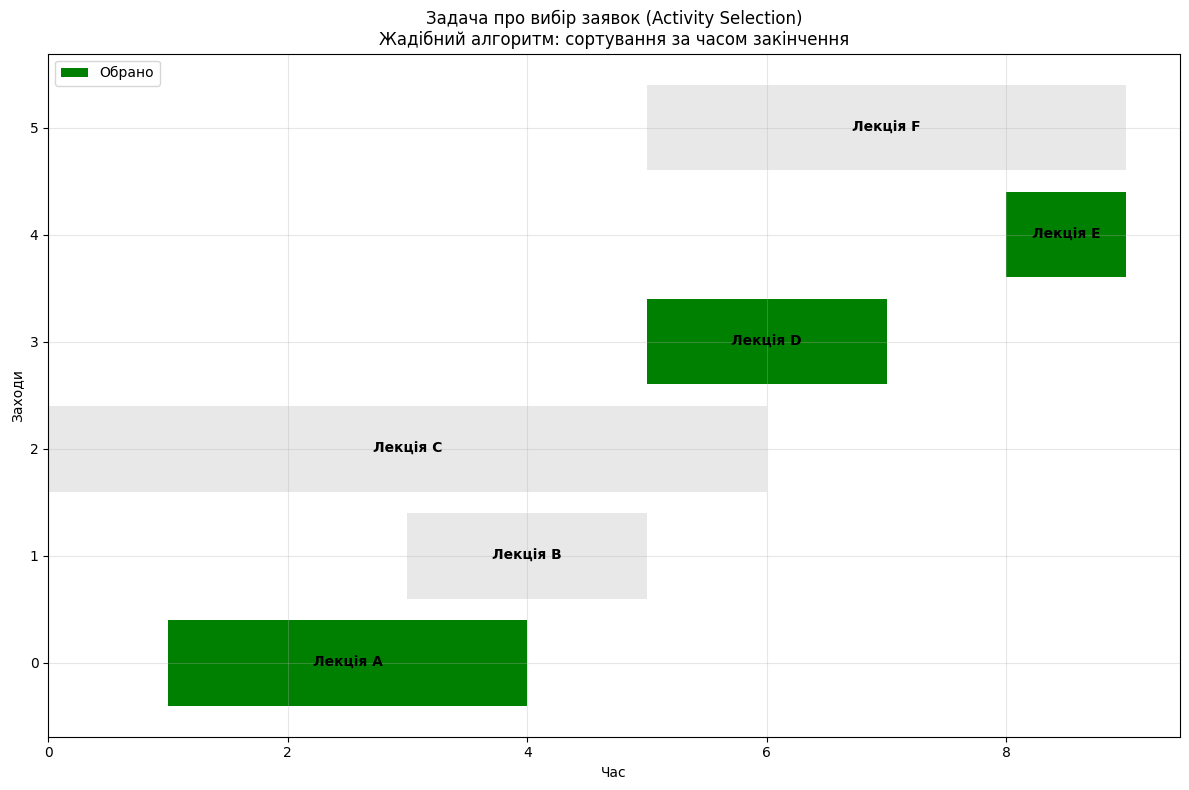

[Activity(name='Лекція A', start_time=1, end_time=4),
 Activity(name='Лекція D', start_time=5, end_time=7),
 Activity(name='Лекція E', start_time=8, end_time=9)]

In [2]:
# Демонстрація базового випадку
demo_activity_selection()


ДЕМОНСТРАЦІЯ: Задача про вибір заявок (Activity Selection)

Всього активностей: 14
Повний розклад:
  1. Ранкова пробіжка               ( 6.0 – 7.0 )  ✓ ОБРАНО
  2. Сніданок з родиною             ( 7.0 – 8.0 )  ✓ ОБРАНО
  3. Робоча зустріч (Zoom)          ( 8.5 – 9.5 )  ✓ ОБРАНО
  4. Глибока робота над проектом    ( 9.0 – 11.5)  ✗ пропущено
  5. Прогулянка/кава-брейк          (11.5 – 12.0)  ✓ ОБРАНО
  6. Онлайн-лекція                  (12.0 – 13.0)  ✓ ОБРАНО
  7. Обід                           (13.0 – 14.0)  ✓ ОБРАНО
  8. Зустріч з клієнтом             (13.5 – 14.5)  ✗ пропущено
  9. Читання / навчання             (14.5 – 15.5)  ✓ ОБРАНО
  10. Спортзал                       (16.0 – 17.0)  ✓ ОБРАНО
  11. Покупки / справи               (17.0 – 18.0)  ✓ ОБРАНО
  12. Вечеря                         (18.5 – 19.5)  ✓ ОБРАНО
  13. Перегляд фільму                (20.0 – 22.0)  ✓ ОБРАНО
  14. Медитація / підготовка до сну  (22.0 – 22.5)  ✓ ОБРАНО

Обрано 12 активностей для розкладу без конфліктів

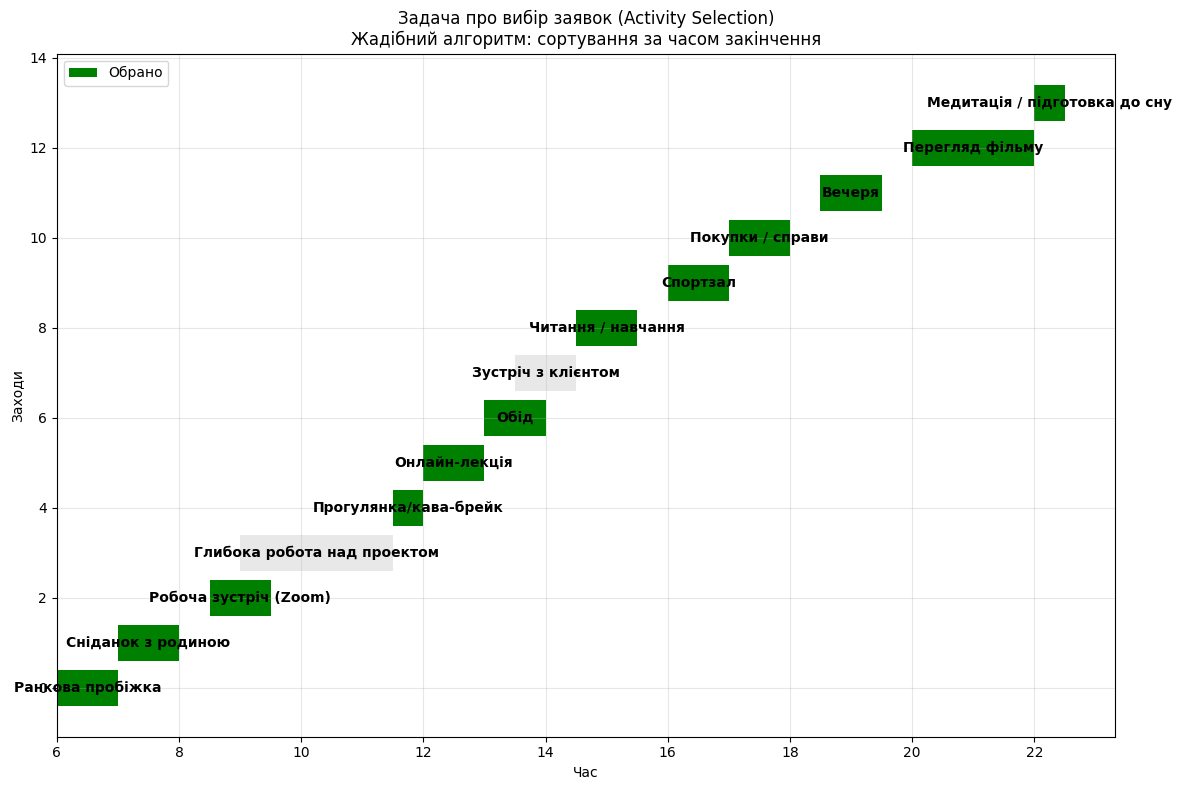

[Activity(name='Ранкова пробіжка', start_time=6.0, end_time=7.0),
 Activity(name='Сніданок з родиною', start_time=7.0, end_time=8.0),
 Activity(name='Робоча зустріч (Zoom)', start_time=8.5, end_time=9.5),
 Activity(name='Прогулянка/кава-брейк', start_time=11.5, end_time=12.0),
 Activity(name='Онлайн-лекція', start_time=12.0, end_time=13.0),
 Activity(name='Обід', start_time=13.0, end_time=14.0),
 Activity(name='Читання / навчання', start_time=14.5, end_time=15.5),
 Activity(name='Спортзал', start_time=16.0, end_time=17.0),
 Activity(name='Покупки / справи', start_time=17.0, end_time=18.0),
 Activity(name='Вечеря', start_time=18.5, end_time=19.5),
 Activity(name='Перегляд фільму', start_time=20.0, end_time=22.0),
 Activity(name='Медитація / підготовка до сну', start_time=22.0, end_time=22.5)]

In [3]:
# Реалістичний приклад: планування робочого дня
activities = [
    Activity("Ранкова пробіжка", 6.0, 7.0),
    Activity("Сніданок з родиною", 7.0, 8.0),
    Activity("Робоча зустріч (Zoom)", 8.5, 9.5),
    Activity("Глибока робота над проектом", 9.0, 11.5),
    Activity("Прогулянка/кава-брейк", 11.5, 12.0),
    Activity("Онлайн-лекція", 12.0, 13.0),
    Activity("Обід", 13.0, 14.0),
    Activity("Зустріч з клієнтом", 13.5, 14.5),
    Activity("Читання / навчання", 14.5, 15.5),
    Activity("Спортзал", 16.0, 17.0),
    Activity("Покупки / справи", 17.0, 18.0),
    Activity("Вечеря", 18.5, 19.5),
    Activity("Перегляд фільму", 20.0, 22.0),
    Activity("Медитація / підготовка до сну", 22.0, 22.5)
]

demo_activity_selection(activities)


 ### Аналіз результатів



 Жадібний алгоритм успішно знаходить оптимальну кількість активностей. Це працює тому, що:



 1. **Властивість жадібного вибору:** Завжди існує оптимальне рішення, що включає активність з найранішим часом закінчення

 2. **Оптимальна підструктура:** Якщо A₁ входить в оптимальне рішення, то решта активностей також формують оптимальне рішення для підзадачі

 3. **Відсутність перекриваючих підзадач:** Кожна активність розглядається лише один раз

 ## 2. Задача про дробовий рюкзак (Fractional Knapsack)



 ### Формулювання задачі

 Маємо рюкзак місткістю W та n предметів, кожен з вагою wᵢ та цінністю vᵢ. Можемо брати частини предметів. Мета: максимізувати загальну цінність.



 ### Жадібний підхід

 **Стратегія:** Сортуємо предмети за спадним співвідношенням цінність/вага, беремо предмети в цьому порядку.



 **Математична модель:**

 ```

 Максимізувати: Σ(vᵢ × xᵢ)

 При обмеженнях: Σ(wᵢ × xᵢ) ≤ W, 0 ≤ xᵢ ≤ 1

 ```



 **Чому жадібний підхід оптимальний:**

 - Якщо предмет A має більше співвідношення v/w ніж B, то завжди краще взяти A першим

 - Це приводить до глобального оптимуму



 **Складність:** O(n log n)

ДЕМОНСТРАЦІЯ: Задача про дробовий рюкзак (Fractional Knapsack)
Місткість рюкзака: 50.0

Предмети (відсортовані за щільністю цінність/вага):
  Залізо: вага=25, цінність=50, щільність=2.00
  Бронза: вага=15, цінність=45, щільність=3.00
  Діаманти: вага=30, цінність=120, щільність=4.00
  Срібло: вага=20, цінність=100, щільність=5.00
  Золото: вага=10, цінність=60, щільність=6.00

Результат жадібного алгоритму:
  Максимальна цінність: 135.00
  Обрані предмети:
    Залізо: 100.0% (вага: 25.0, цінність: 50.0)
    Бронза: 100.0% (вага: 15.0, цінність: 45.0)
    Діаманти: 33.3% (вага: 10.0, цінність: 40.0)
  Загальна вага: 50.0/50.0

Стратегія: сортування за щільністю (цінність/вага)
Часова складність: O(n log n)


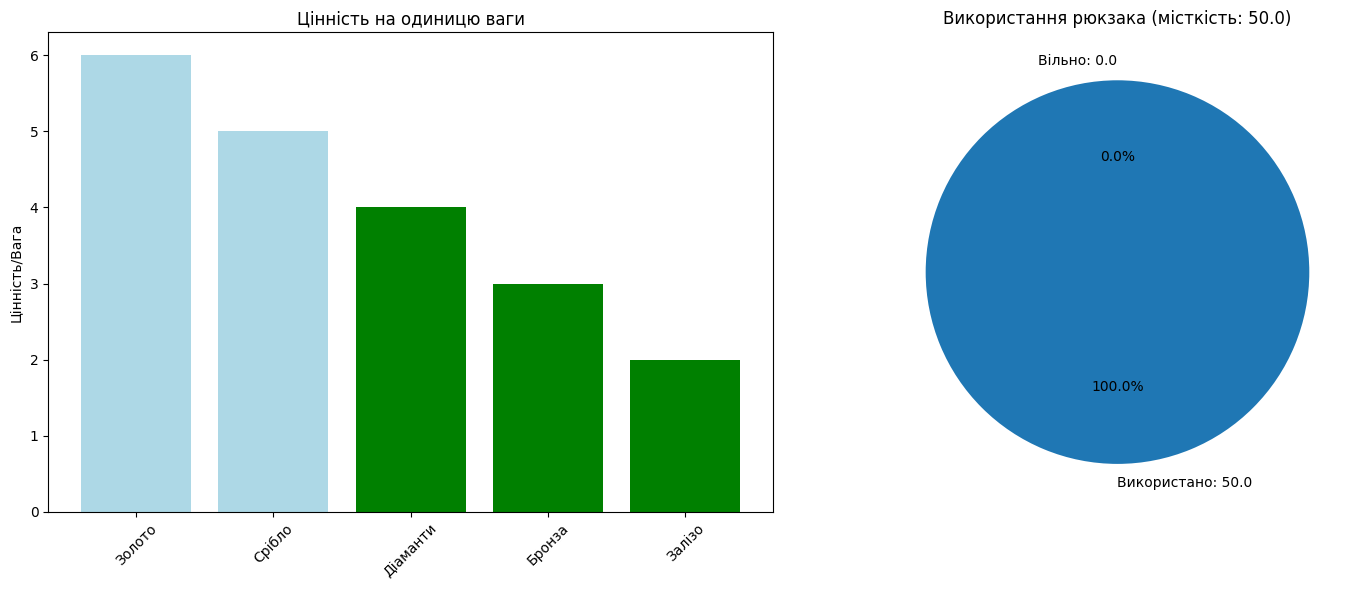

(135.0,
 [(Item(name='Залізо', weight=25, value=50), 1.0),
  (Item(name='Бронза', weight=15, value=45), 1.0),
  (Item(name='Діаманти', weight=30, value=120), 0.3333333333333333)])

In [4]:
# Демонстрація базового випадку
demo_fractional_knapsack()


ДЕМОНСТРАЦІЯ: Задача про дробовий рюкзак (Fractional Knapsack)
Місткість рюкзака: 10

Предмети (відсортовані за щільністю цінність/вага):
  Куртка: вага=2.5, цінність=60, щільність=24.00
  Пляшка води: вага=1.0, цінність=30, щільність=30.00
  Спальний мішок: вага=3.5, цінність=110, щільність=31.43
  Книга: вага=1.5, цінність=50, щільність=33.33
  Їжа (перекус): вага=1.2, цінність=40, щільність=33.33
  Термобілизна: вага=1.3, цінність=55, щільність=42.31
  Ліхтарик: вага=0.6, цінність=35, щільність=58.33
  Записник + ручка: вага=0.4, цінність=25, щільність=62.50
  Фотоапарат: вага=1.8, цінність=120, щільність=66.67
  Аптечка: вага=1.0, цінність=90, щільність=90.00
  Зарядні кабелі: вага=0.2, цінність=20, щільність=100.00
  Навушники: вага=0.3, цінність=40, щільність=133.33
  Ноутбук: вага=2.0, цінність=300, щільність=150.00
  Павербанк: вага=0.5, цінність=80, щільність=160.00
  Планшет: вага=0.7, цінність=150, щільність=214.29

Результат жадібного алгоритму:
  Максимальна цінність: 302.

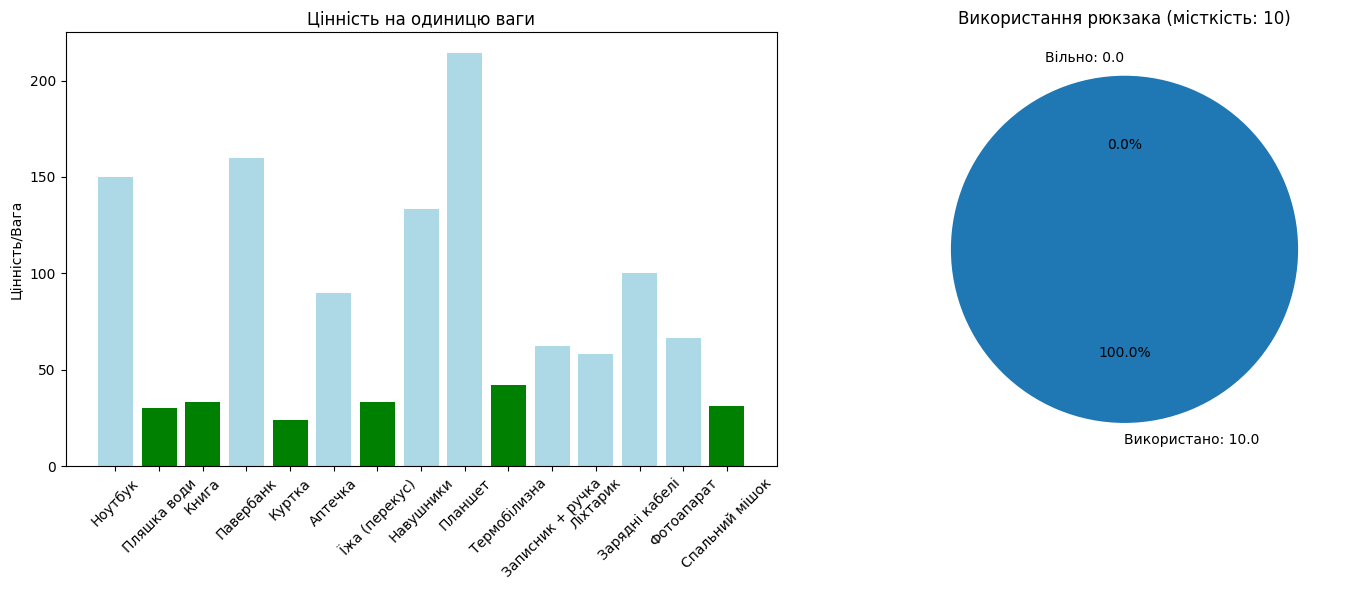

(302.6923076923077,
 [(Item(name='Куртка', weight=2.5, value=60), 1.0),
  (Item(name='Пляшка води', weight=1.0, value=30), 1.0),
  (Item(name='Спальний мішок', weight=3.5, value=110), 1.0),
  (Item(name='Книга', weight=1.5, value=50), 1.0),
  (Item(name='Їжа (перекус)', weight=1.2, value=40), 1.0),
  (Item(name='Термобілизна', weight=1.3, value=55), 0.23076923076923078)])

In [5]:
# Реалістичний приклад: збирання рюкзака в подорож
items = [
    Item("Ноутбук", 2.0, 300),         # дуже корисний, легкий
    Item("Пляшка води", 1.0, 30),      # життєво важлива
    Item("Книга", 1.5, 50),            # освітня цінність
    Item("Павербанк", 0.5, 80),        # багато користі при малій вазі
    Item("Куртка", 2.5, 60),           # потрібна при поганій погоді
    Item("Аптечка", 1.0, 90),          # критична для безпеки
    Item("Їжа (перекус)", 1.2, 40),    # енергетична підтримка
    Item("Навушники", 0.3, 40),        # невелика вага, помірна цінність
    Item("Планшет", 0.7, 150),         # альтернатива ноутбуку
    Item("Термобілизна", 1.3, 55),     # комфорт в умовах холоду
    Item("Записник + ручка", 0.4, 25), # низька вага, деяка користь
    Item("Ліхтарик", 0.6, 35),         # важливий у темряві
    Item("Зарядні кабелі", 0.2, 20),   # потрібні, але неважкі
    Item("Фотоапарат", 1.8, 120),      # висока цінність для блогера
    Item("Спальний мішок", 3.5, 110)   # важкий, але критично корисний у поході
]

capacity = 10

demo_fractional_knapsack(items, capacity)


 ### Порівняння з цілочисловим рюкзаком



 **Дробовий рюкзак (Fractional Knapsack):**

 - Можемо брати частини предметів

 - Жадібний алгоритм дає оптимальний результат

 - O(n log n) складність



 **Цілочисловий рюкзак (0/1 Knapsack):**

 - Предмет або береми повністю, або не береми взагалі

 - Жадібний алгоритм НЕ гарантує оптимальність

 - Потрібне динамічне програмування

 - O(nW) складність, де W - місткість рюкзака

 ## 3. Обмеження жадібних алгоритмів: Задача про розмін монет



 ### Коли жадібні алгоритми не працюють



 Задача про розмін монет є чудовим прикладом того, коли жадібний підхід може провалитися.



 **Формулювання:** Маємо монети різних номіналів та суму S. Потрібно знайти мінімальну кількість монет для розміну.



 **Жадібний підхід:** Завжди беремо найбільшу можливу монету.



 ### Випадки успіху та провалу



 **Канонічна система монет (працює):**

 - Монети: [25, 10, 5, 1] (центи США)

 - Жадібний алгоритм завжди дає оптимальний результат



 **Неканонічна система (не працює):**

 - Монети: [9, 6, 1], сума: 11

 - Жадібний: 9 + 1 + 1 = 3 монети

 - Оптимальний: 6 + 5 × 1 = 2 монети

In [6]:
# Порівняння жадібного та динамічного підходів
PerformanceComparator.compare_coin_change()


=== ПОРІВНЯННЯ РОЗМІНУ МОНЕТ ===

1. КАНОНІЧНА СИСТЕМА: монети [25, 10, 5, 1], сума 30
   Жадібний: 2 монет [25, 5]
   ДП:       2 монет [25, 5]
   Результат: Однаковий!

2. НЕКАНОНІЧНА СИСТЕМА: монети [4, 3, 1], сума 6
   Жадібний: 3 монет [4, 1, 1]
   ДП:       2 монет [3, 3]
   Результат: ДП кращий!


((2, 2), (3, 2))

In [7]:
# Детальний аналіз різних випадків
cases = [
    # Класичний випадок (канонічна система)
    {
        'coins1': [25, 10, 5, 1],
        'amount1': 30,
        'coins2': [10, 5, 1],
        'amount2': 28
    },
    # Неканонічна система з "пасткою"
    {
        'coins1': [9, 6, 1],
        'amount1': 11,
        'coins2': [4, 3, 1],
        'amount2': 6
    },
    # Випадок із неефективним greedy
    {
        'coins1': [7, 5, 1],
        'amount1': 18,
        'coins2': [9, 4, 1],
        'amount2': 15
    },
    # Нестандартна валюта
    {
        'coins1': [1, 7, 10, 22],
        'amount1': 29,
        'coins2': [1, 3, 4],
        'amount2': 6
    },
    # Ситуація, де greedy може бути правильним, але не завжди
    {
        'coins1': [1, 3, 4],
        'amount1': 5,
        'coins2': [1, 3, 4],
        'amount2': 6
    }
]

for i, param in enumerate(cases, 1):
    print(f"\n--- ПРИКЛАД {i} ---")
    PerformanceComparator.compare_coin_change(**param)



--- ПРИКЛАД 1 ---
=== ПОРІВНЯННЯ РОЗМІНУ МОНЕТ ===

1. КАНОНІЧНА СИСТЕМА: монети [25, 10, 5, 1], сума 30
   Жадібний: 2 монет [25, 5]
   ДП:       2 монет [25, 5]
   Результат: Однаковий!

2. НЕКАНОНІЧНА СИСТЕМА: монети [10, 5, 1], сума 28
   Жадібний: 6 монет [10, 10, 5, 1, 1, 1]
   ДП:       6 монет [10, 10, 5, 1, 1, 1]
   Результат: Однаковий!

--- ПРИКЛАД 2 ---
=== ПОРІВНЯННЯ РОЗМІНУ МОНЕТ ===

1. КАНОНІЧНА СИСТЕМА: монети [9, 6, 1], сума 11
   Жадібний: 3 монет [9, 1, 1]
   ДП:       3 монет [9, 1, 1]
   Результат: Однаковий!

2. НЕКАНОНІЧНА СИСТЕМА: монети [4, 3, 1], сума 6
   Жадібний: 3 монет [4, 1, 1]
   ДП:       2 монет [3, 3]
   Результат: ДП кращий!

--- ПРИКЛАД 3 ---
=== ПОРІВНЯННЯ РОЗМІНУ МОНЕТ ===

1. КАНОНІЧНА СИСТЕМА: монети [7, 5, 1], сума 18
   Жадібний: 6 монет [7, 7, 1, 1, 1, 1]
   ДП:       4 монет [7, 5, 5, 1]
   Результат: Відрізняється!

2. НЕКАНОНІЧНА СИСТЕМА: монети [9, 4, 1], сума 15
   Жадібний: 4 монет [9, 4, 1, 1]
   ДП:       4 монет [9, 4, 1, 1]
   Ре

ДЕМОНСТРАЦІЯ: Задача про розмін монет (Жадібний vs ДП)
=== ПОРІВНЯННЯ РОЗМІНУ МОНЕТ ===

1. КАНОНІЧНА СИСТЕМА: монети [25, 10, 5, 1], сума 30
   Жадібний: 2 монет [25, 5]
   ДП:       2 монет [25, 5]
   Результат: Однаковий!

2. НЕКАНОНІЧНА СИСТЕМА: монети [4, 3, 1], сума 6
   Жадібний: 3 монет [4, 1, 1]
   ДП:       2 монет [3, 3]
   Результат: ДП кращий!

Детальний аналіз для монет [4, 3, 1] і суми 6:
ДП знайшов оптимальний розв'язок: 2 монет [3, 3]


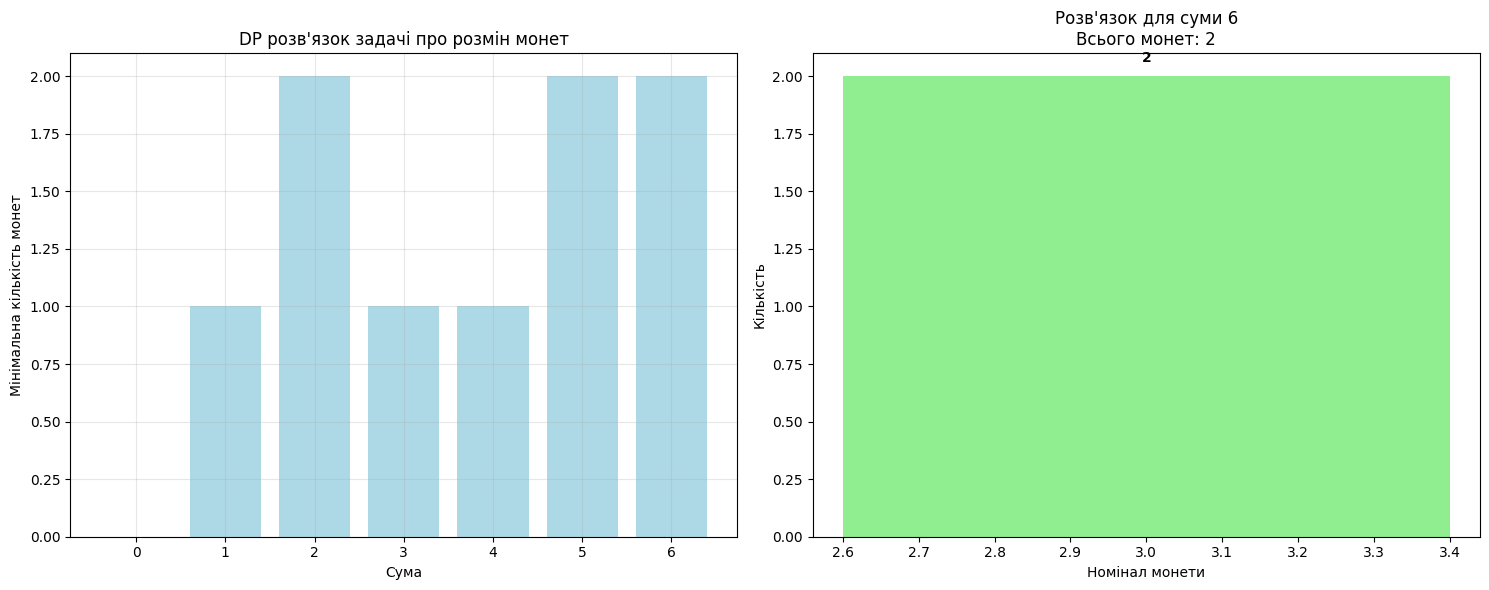

(2, [3, 3])

In [8]:
# Демонстрація основної функції
demo_coin_change()


 ### Висновки про обмеження жадібних алгоритмів



 **Коли жадібний підхід може провалитися:**

 1. **Відсутність властивості жадібного вибору** - локальний оптимум не веде до глобального

 2. **Складні залежності між елементами** - вибір одного елемента кардинально впливає на майбутні можливості

 3. **Неканонічні системи** - як у випадку з монетами



 **Критерії успішного використання жадібних алгоритмів:**

 1. **Властивість жадібного вибору** - існує глобально оптимальне рішення, що містить локально оптимальний вибір

 2. **Оптимальна підструктура** - задача розбивається на підзадачі з такою ж властивістю

 3. **Матроїдна структура** - математична структура, що гарантує коректність жадібного підходу

 ## 4. Алгоритм Гаффмана (Huffman Coding)



 ### Стиснення даних через оптимальне кодування



 Алгоритм Гаффмана - це жадібний алгоритм для побудови оптимального префіксного коду для стиснення даних без втрат.



 ### Принцип роботи



 1. **Підрахунок частот** символів у тексті

 2. **Створення листів** дерева для кожного символу

 3. **Жадібна побудова дерева:**

    - Завжди об'єднуємо два вузли з найменшими частотами

    - Повторюємо до отримання одного кореня

 4. **Генерація кодів** на основі шляхів у дереві



 ### Математичне обґрунтування



 **Мета:** Мінімізувати середню довжину коду:

 ```

 L = Σ(f(c) × l(c))

 ```

 де f(c) - частота символу c, l(c) - довжина його коду.



 **Чому жадібний підхід оптимальний:**

 - Символи з високою частотою отримують короткі коди

 - Об'єднання найрідших символів мінімізує загальну довжину

 - Має властивість оптимальної підструктури

ДЕМОНСТРАЦІЯ: Алгоритм Гаффмана (Huffman Coding)
Оригінальний текст: 'ABRACADABRA'
Довжина: 11 символів

Таблиця частот:
  'A': 5 разів
  'B': 2 разів
  'C': 1 разів
  'D': 1 разів
  'R': 2 разів

Коди Гаффмана:
  'A': 0
  'B': 111
  'C': 101
  'D': 100
  'R': 110

Закодований текст: 01111100101010001111100
Довжина закодованого: 23 біт

Статистика стиснення:
  ASCII (8 біт/символ): 88 біт
  Гаффман: 23 біт
  Коефіцієнт стиснення: 0.261
  Економія місця: 73.9%

Стратегія: жадібне об'єднання найрідших символів
Часова складність: O(n log n)


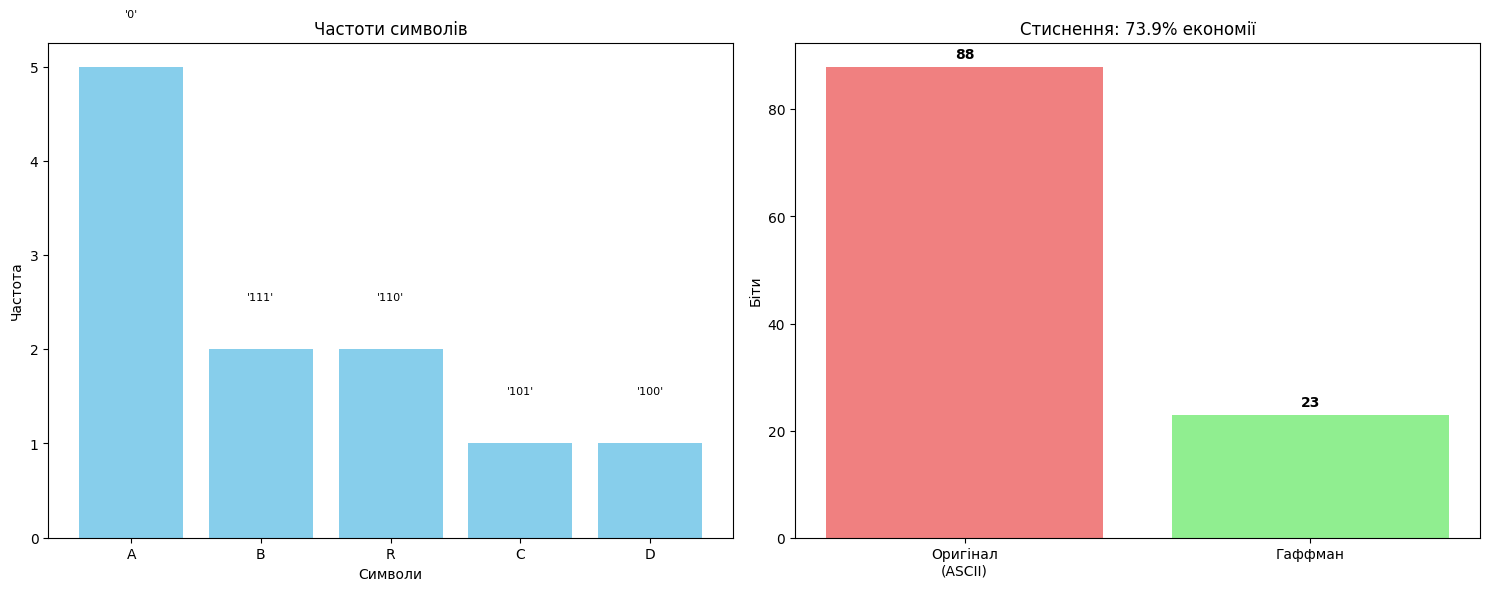

In [9]:
# Демонстрація базового прикладу
demo_huffman_coding()


ДЕМОНСТРАЦІЯ: Алгоритм Гаффмана (Huffman Coding)
Оригінальний текст: 'SHE SELLS SEA SHELLS BY THE SEA SHORE AND SHE STILL SELLS THEM SURELY'
Довжина: 69 символів

Таблиця частот:
  ' ': 13 разів
  'A': 3 разів
  'B': 1 разів
  'D': 1 разів
  'E': 11 разів
  'H': 6 разів
  'I': 1 разів
  'L': 9 разів
  'M': 1 разів
  'N': 1 разів
  'O': 1 разів
  'R': 2 разів
  'S': 13 разів
  'T': 3 разів
  'U': 1 разів
  'Y': 2 разів

Коди Гаффмана:
  ' ': 00
  'A': 10110
  'B': 1011111
  'D': 101001
  'E': 110
  'H': 010
  'I': 101000
  'L': 100
  'M': 1011110
  'N': 101010
  'O': 101011
  'R': 01110
  'S': 111
  'T': 0110
  'U': 101110
  'Y': 01111

Закодований текст: 111010110001111101001001110011111010110001110101101001001110010111110111100011001011000111110101100011101010101101110110001011010101010100100111010110001110110101000100100001111101001001110001100101101011110001111011100111011010001111
Довжина закодованого: 234 біт

Статистика стиснення:
  ASCII (8 біт/символ): 552 біт
  Гаффман: 234 бі

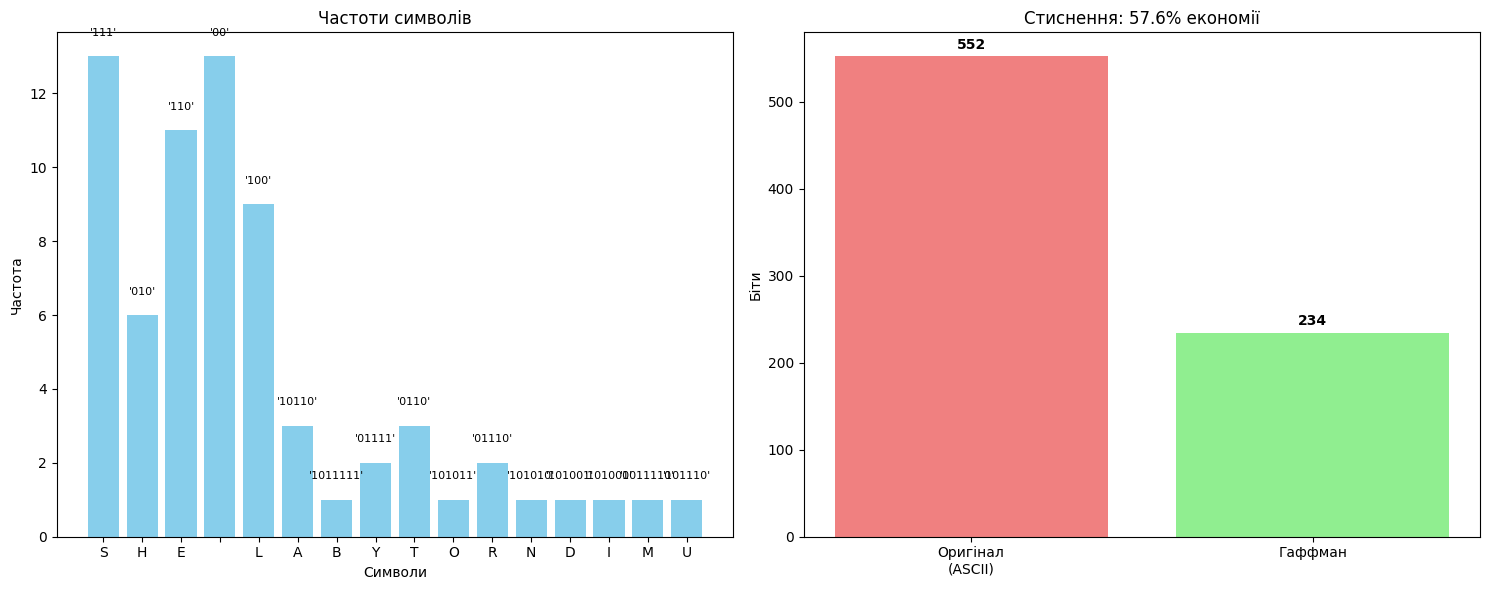

In [10]:
# Реалістичний приклад: стиснення англійського тексту
text = "SHE SELLS SEA SHELLS BY THE SEA SHORE AND SHE STILL SELLS THEM SURELY"

demo_huffman_coding(text)


 ### Аналіз ефективності кодування Гаффмана



 **Переваги:**

 - Оптимальний префіксний код

 - Адаптивність до розподілу символів

 - Без втрат інформації

 - Широке практичне застосування



 **Обмеження:**

 - Потребує знання частот символів наперед

 - Неефективний для рівномірних розподілів

 - Код може бути довшим за фіксовану довжину для коротких текстів



 **Практичні застосування:**

 - Стиснення файлів (ZIP, GZIP)

 - Передача даних по мережі

 - Кодування в мультимедіа форматах

 ## 5. Числа Фібоначчі: порівняння підходів



 ### Класичний приклад перекриваючих підзадач



 Обчислення чисел Фібоначчі демонструє кардинальну різницю між наївним рекурсивним підходом та динамічним програмуванням.



 ### Математичне визначення

 ```

 F(n) = F(n-1) + F(n-2)

 F(0) = 0, F(1) = 1

 ```



 ### Порівняння підходів



 1. **Наївна рекурсія:** O(2ⁿ) - експоненційна складність

 2. **Динамічне програмування (мемоізація):** O(n) - лінейна складність

 3. **Динамічне програмування (табуляція):** O(n) час, O(1) пам'ять

 4. **Матричне піднесення до степеня:** O(log n)



 ### Проблема наївного підходу

 Наївна рекурсія обчислює одні й ті ж значення багато разів:

 ```

 F(5) = F(4) + F(3)

 F(4) = F(3) + F(2)  // F(3) обчислюється двічі

 F(3) = F(2) + F(1)  // F(2) обчислюється тричі

 ```

ДЕМОНСТРАЦІЯ: Числа Фібоначчі (Наївна рекурсія vs ДП)
Обчислюємо F(10) трьома способами:
  1. Наївна рекурсія: F(10) = 55
     Часова складність: O(2^n) - ЖАХЛИВО!
  2. Мемоізація (Top-Down): F(10) = 55
     Часова складність: O(n)
  3. Табуляція (Bottom-Up): F(10) = 55
     Часова складність: O(n), Просторова: O(1)

Першні 11 чисел Фібоначчі:
  [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


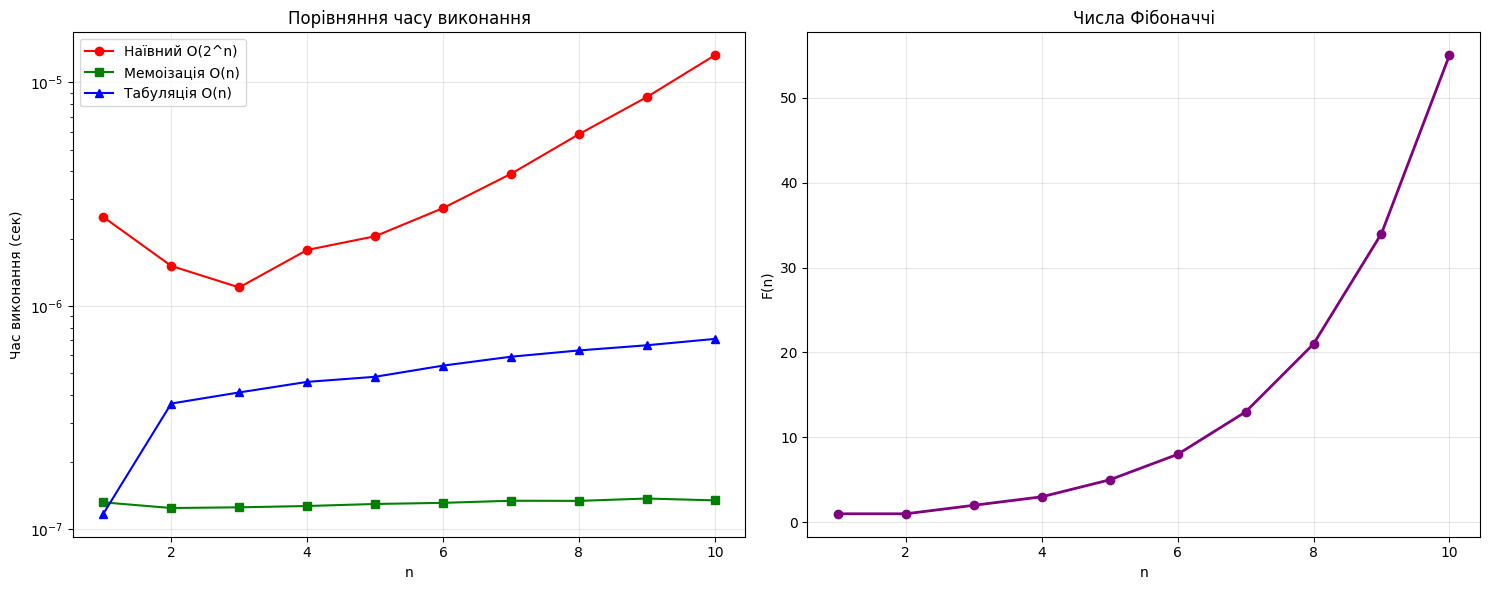

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [11]:
# Порівняння різних підходів
demo_fibonacci_comparison()


ДЕМОНСТРАЦІЯ: Числа Фібоначчі (Наївна рекурсія vs ДП)
Обчислюємо F(35) трьома способами:
  2. Мемоізація (Top-Down): F(35) = 9227465
     Часова складність: O(n)
  3. Табуляція (Bottom-Up): F(35) = 9227465
     Часова складність: O(n), Просторова: O(1)

Першні 36 чисел Фібоначчі:
  [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465]


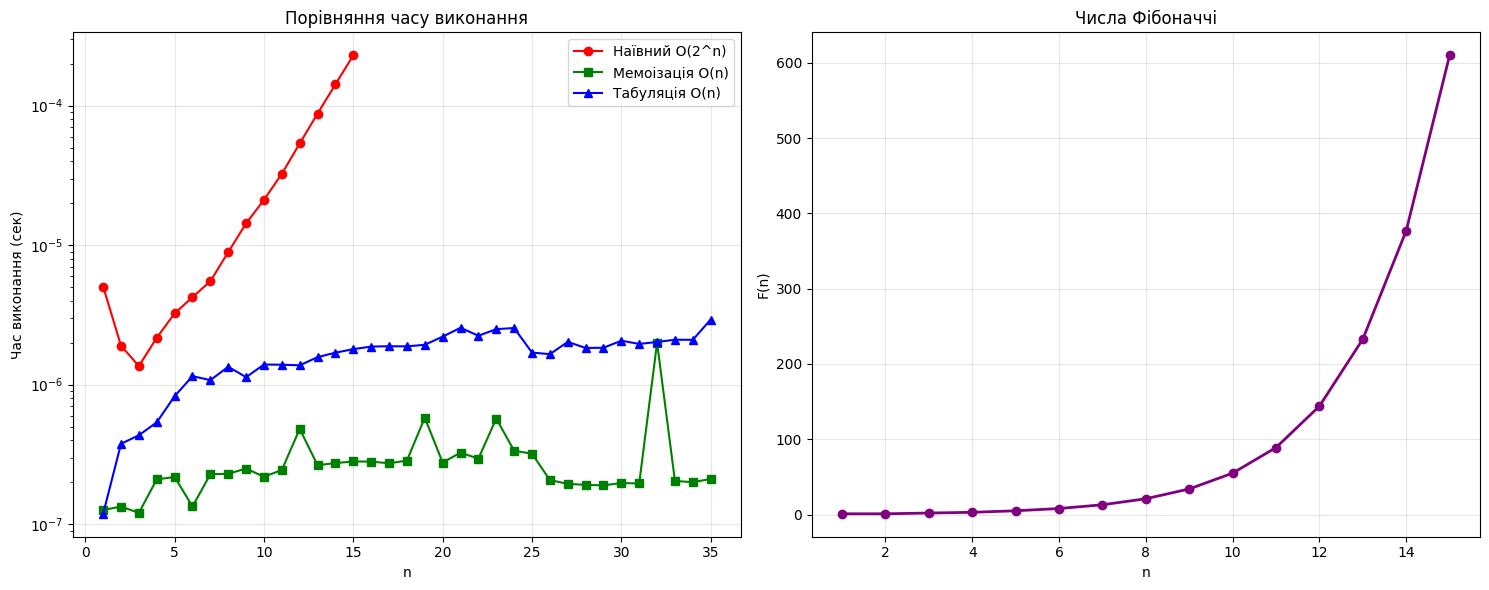

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465]

In [12]:
# Тестування на більшому числі
n = 35  # Не використовуємо 100, бо наївна рекурсія займе занадто багато часу

demo_fibonacci_comparison(n)


 ### Ключові висновки з аналізу Фібоначчі



 **Динамічне програмування вирішує дві основні проблеми:**

 1. **Перекриваючі підзадачі** - зберігаємо результати вже обчислених значень

 2. **Оптимальна підструктура** - F(n) залежить від F(n-1) та F(n-2)



 **Два основні підходи DP:**

 1. **Мемоізація (top-down)** - рекурсія з кешуванням

 2. **Табуляція (bottom-up)** - ітеративне заповнення таблиці



 **Практичне значення:**

 - Демонструє важливість вибору правильного алгоритму

 - Показує, як правильна структура даних може кардинально покращити продуктивність

 - Ілюструє концепцію компромісу час-пам'ять

 ## 6. Задача про рюкзак 0/1 (0/1 Knapsack Problem)



 ### Класична задача динамічного програмування



 На відміну від дробового рюкзака, у цій задачі ми можемо або взяти предмет повністю, або не брати його взагалі.



 ### Формулювання задачі

 ```

 Максимізувати: Σ(vᵢ × xᵢ)

 При обмеженнях: Σ(wᵢ × xᵢ) ≤ W

 xᵢ ∈ {0, 1}

 ```



 ### Чому жадібний підхід не працює



 **Контрприклад:**

 - Предмети: (вага, цінність) = [(10, 10), (20, 20), (15, 15)]

 - Місткість: 30

 - Жадібний (за v/w): бере (10,10) та (20,20) = цінність 30

 - Оптимальний: бере (20,20) та (15,15) = цінність 35



 ### Рішення через динамічне програмування



 **Рекурентна формула:**

 ```

 dp[i][w] = max(dp[i-1][w], dp[i-1][w-weight[i]] + value[i])

 ```



 де dp[i][w] - максимальна цінність для перших i предметів з вагою ≤ w.



 **Складність:** O(nW) час, O(nW) пам'ять (можна оптимізувати до O(W))

ДЕМОНСТРАЦІЯ: Задача про рюкзак 0/1 (Dynamic Programming)
Місткість рюкзака: 5
Доступні предмети:
  1. Телефон: вага=1, цінність=1000
  2. Ноутбук: вага=4, цінність=3000
  3. Камера: вага=2, цінність=2000
  4. Книга: вага=1, цінність=100
  5. Планшет: вага=3, цінність=1500

Результат динамічного програмування:
  Максимальна цінність: 4000
  Обрані предмети:
    • Ноутбук (вага: 4, цінність: 3000)
    • Телефон (вага: 1, цінність: 1000)
  Загальна вага: 5/5

Чому жадібний підхід тут НЕ працює:
  Жадібний би обрав за щільністю (цінність/вага)
  Порядок за щільністю:
    Телефон: щільність = 1000.0
    Камера: щільність = 1000.0
    Ноутбук: щільність = 750.0
    Планшет: щільність = 500.0
    Книга: щільність = 100.0

Стратегія ДП: розглядаємо ВСІ можливості через підзадачі
Часова складність: O(n × W), де W - місткість


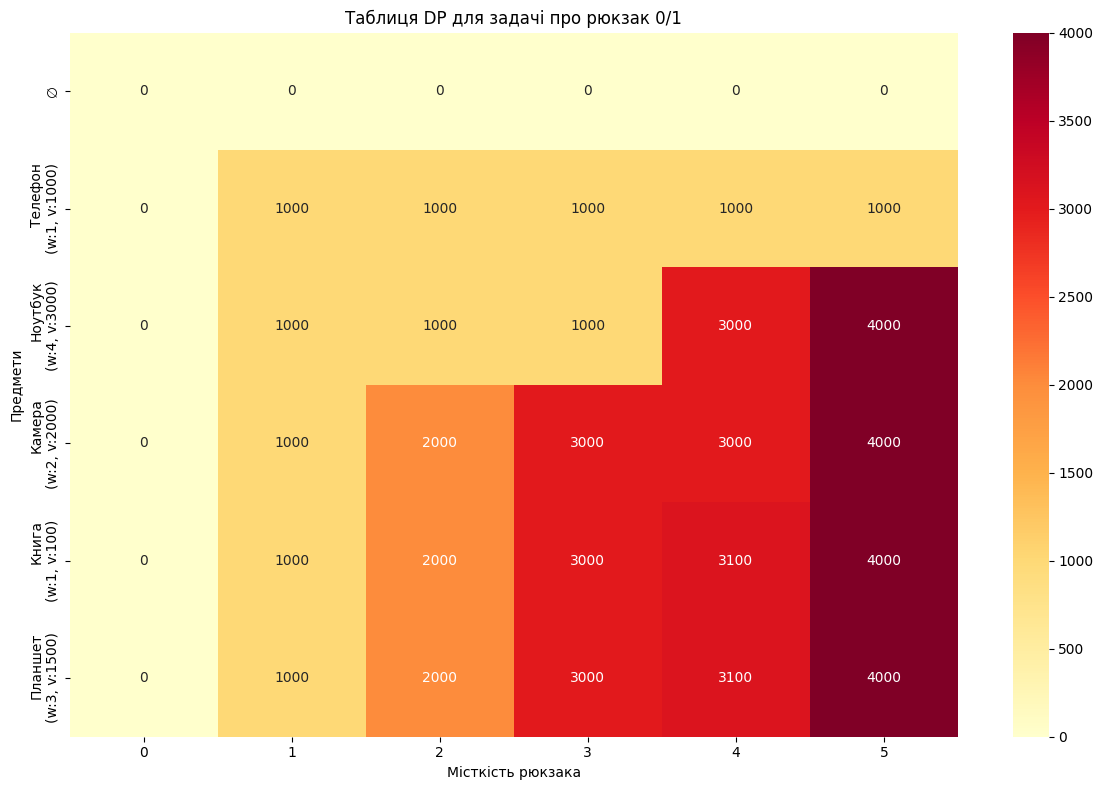

(4000,
 [DPItem(name='Ноутбук', weight=4, value=3000),
  DPItem(name='Телефон', weight=1, value=1000)])

In [13]:
# Демонстрація базового випадку
demo_knapsack_01()


ДЕМОНСТРАЦІЯ: Задача про рюкзак 0/1 (Dynamic Programming)
Місткість рюкзака: 8
Доступні предмети:
  1. Ноутбук: вага=3, цінність=2000
  2. Аптечка: вага=1, цінність=1000
  3. Термобілизна: вага=2, цінність=700
  4. Павербанк: вага=1, цінність=800
  5. Ліхтарик: вага=1, цінність=500
  6. Фотоапарат: вага=2, цінність=1200
  7. Їжа: вага=3, цінність=900
  8. Книга: вага=1, цінність=300

Результат динамічного програмування:
  Максимальна цінність: 5500
  Обрані предмети:
    • Фотоапарат (вага: 2, цінність: 1200)
    • Ліхтарик (вага: 1, цінність: 500)
    • Павербанк (вага: 1, цінність: 800)
    • Аптечка (вага: 1, цінність: 1000)
    • Ноутбук (вага: 3, цінність: 2000)
  Загальна вага: 8/8

Чому жадібний підхід тут НЕ працює:
  Жадібний би обрав за щільністю (цінність/вага)
  Порядок за щільністю:
    Аптечка: щільність = 1000.0
    Павербанк: щільність = 800.0
    Ноутбук: щільність = 666.7
    Фотоапарат: щільність = 600.0
    Ліхтарик: щільність = 500.0
    Термобілизна: щільність = 3

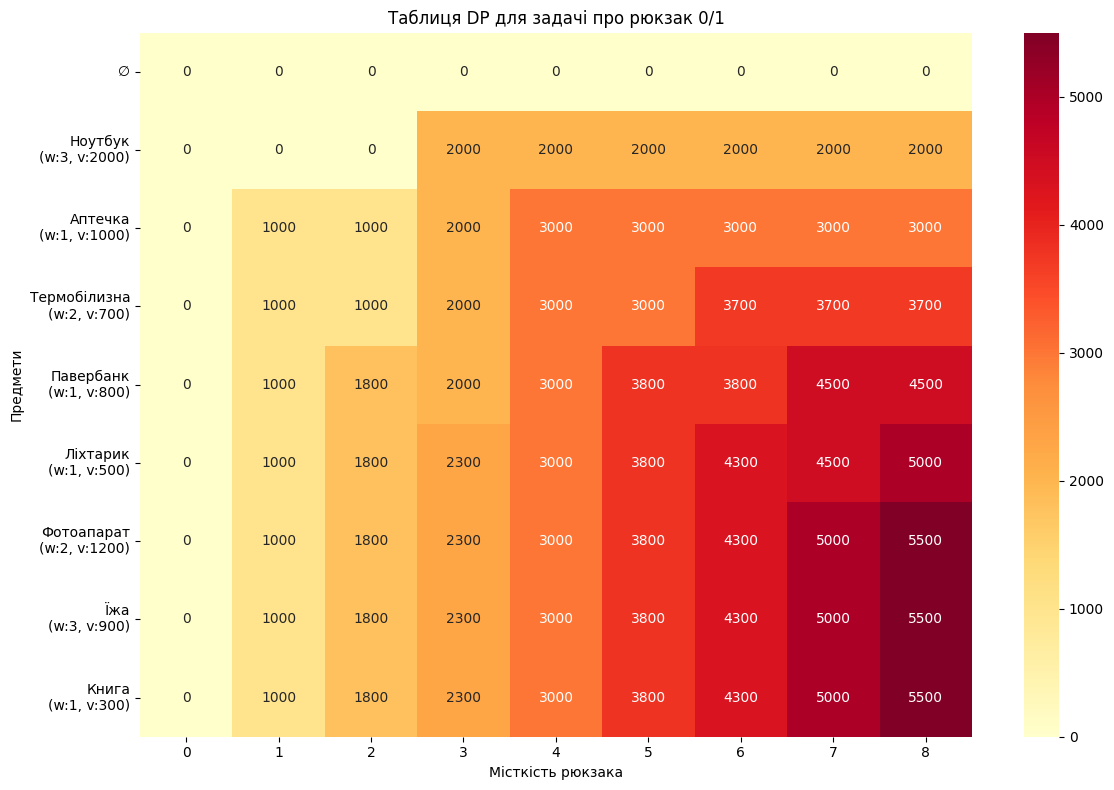

(5500,
 [DPItem(name='Фотоапарат', weight=2, value=1200),
  DPItem(name='Ліхтарик', weight=1, value=500),
  DPItem(name='Павербанк', weight=1, value=800),
  DPItem(name='Аптечка', weight=1, value=1000),
  DPItem(name='Ноутбук', weight=3, value=2000)])

In [14]:
# Реалістичний приклад: збирання рюкзака для експедиції
items_01 = [
    DPItem("Ноутбук", 3, 2000),         # робота, висока цінність
    DPItem("Аптечка", 1, 1000),         # виживання
    DPItem("Термобілизна", 2, 700),     # тепло в польових умовах
    DPItem("Павербанк", 1, 800),        # живлення
    DPItem("Ліхтарик", 1, 500),         # орієнтація вночі
    DPItem("Фотоапарат", 2, 1200),      # для фіксації подій
    DPItem("Їжа", 3, 900),              # енергія
    DPItem("Книга", 1, 300),            # психологічна підтримка
]

capacity_01 = 8

demo_knapsack_01(items=items_01, capacity=capacity_01)


 ### Оптимізації для задачі про рюкзак



 **Просторові оптимізації:**

 1. **1D масив** - O(W) пам'яті замість O(nW)

 2. **Зворотний прохід** - уникнення перезапису поточних значень



 **Часові оптимізації:**

 1. **Bounded Knapsack** - якщо є кілька копій кожного предмета

 2. **Unbounded Knapsack** - необмежена кількість кожного предмета

 3. **Meet-in-the-middle** - для випадків з малою кількістю предметів



 **Практичні застосування:**

 - Розподіл ресурсів

 - Портфельна оптимізація

 - Планування проектів

 - Розкрій матеріалів

 ## 7. Графові алгоритми



 ### Алгоритм Дейкстри: жадібний підхід до найкоротших шляхів



 Алгоритм Дейкстри - це жадібний алгоритм для знаходження найкоротших шляхів від одного джерела до всіх інших вершин у графі з невід'ємними вагами ребер.



 ### Принцип роботи



 1. **Ініціалізація:** встановлюємо відстань до початкової вершини = 0, до всіх інших = ∞

 2. **Жадібний вибір:** завжди обираємо необроблену вершину з мінімальною відстанню

 3. **Релаксація:** оновлюємо відстані до сусідніх вершин

 4. **Повторення** до обробки всіх вершин



 **Складність:** O((V + E) log V) з пріоритетною чергою



 ### Мінімальне остовне дерево



 **Алгоритм Пріма (жадібний):**

 - Починаємо з довільної вершини

 - Завжди додаємо найлегше ребро, що з'єднує дерево з новою вершиною



 **Алгоритм Крускала (жадібний):**

 - Сортуємо всі ребра за вагою

 - Додаємо ребра у порядку зростання ваги, уникаючи циклів

ДЕМОНСТРАЦІЯ: Жадібні алгоритми на графах
Тестовий граф:
  A: B(4), C(2)
  B: A(4), C(1), D(5)
  C: A(2), B(1), D(8), E(10)
  D: B(5), C(8), E(2)
  E: C(10), D(2)

1. АЛГОРИТМ ДЕЙКСТРИ (з вершини A):
   Найкоротші відстані:
     A → A: 0
     A → B: 3
     A → C: 2
     A → D: 8
     A → E: 10


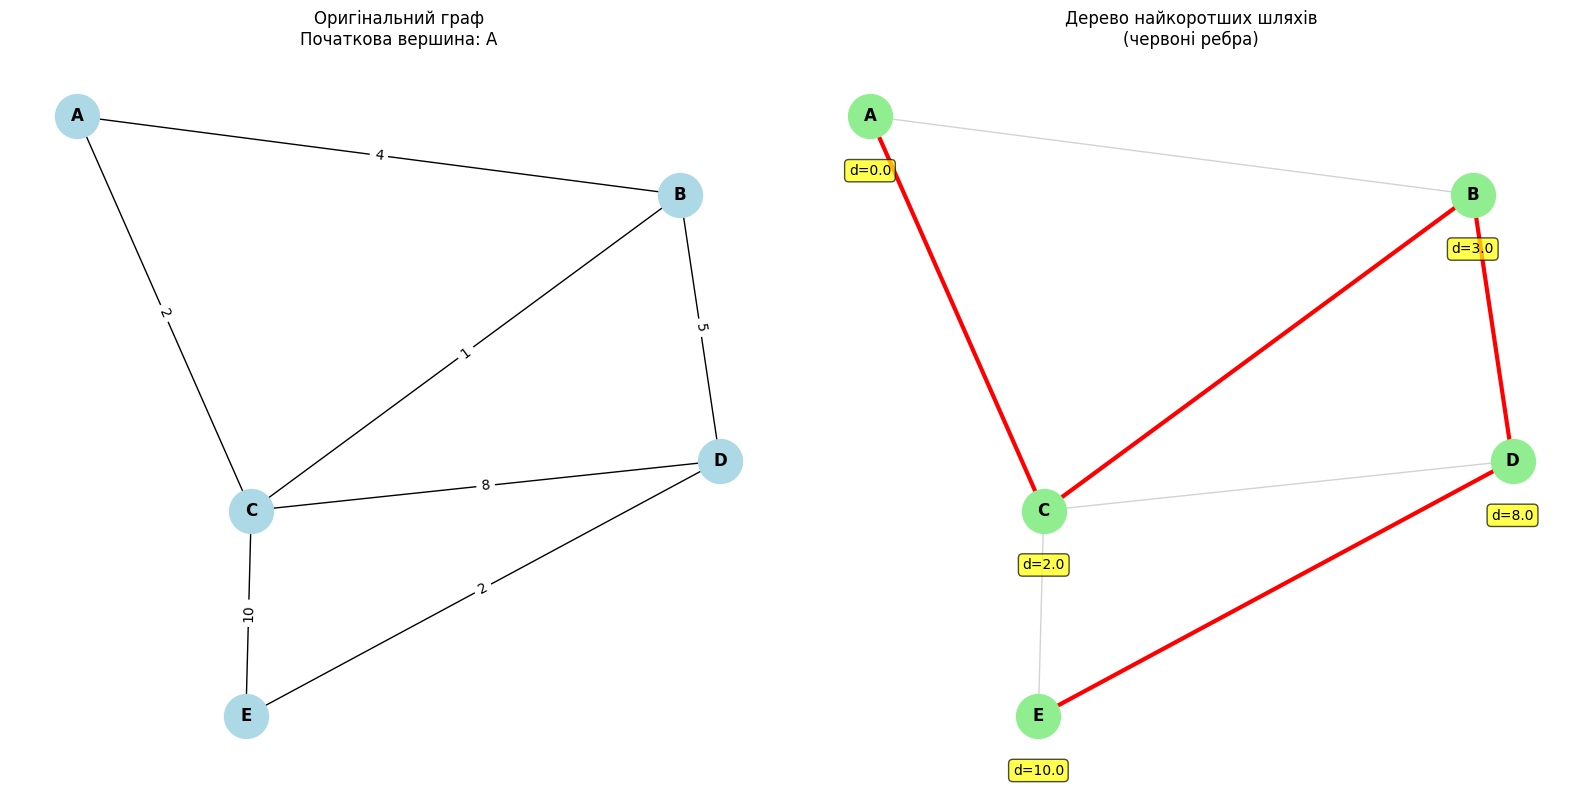


2. МІНІМАЛЬНІ ОСТОВНІ ДЕРЕВА:
   Алгоритм Пріма: вага MST = 10.0
     A - C: 2
     C - B: 1
     B - D: 5
     D - E: 2


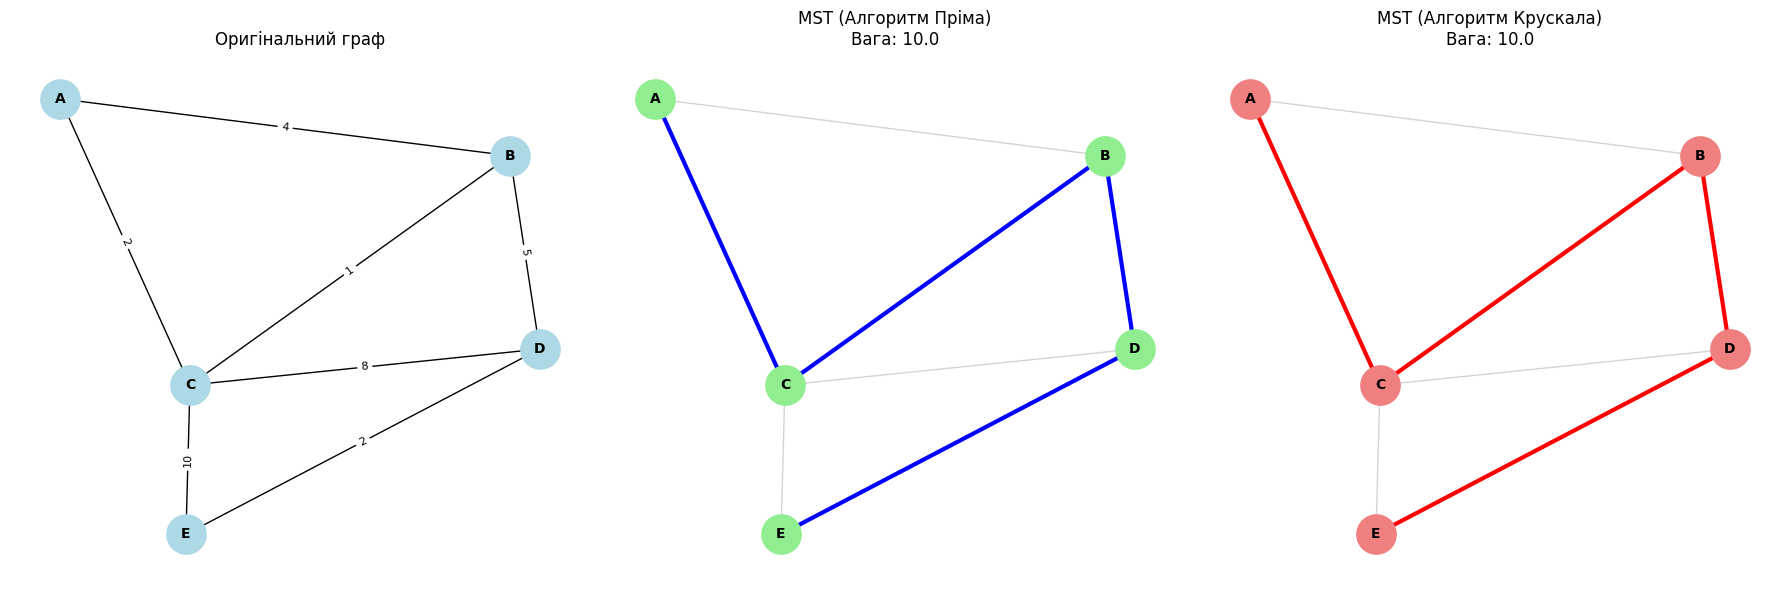

Вага MST (Прім): 10.0
Вага MST (Крускал): 10.0
Результати збігаються: Так


({'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 10},
 [Edge(start='A', end='C', weight=2),
  Edge(start='C', end='B', weight=1),
  Edge(start='B', end='D', weight=5),
  Edge(start='D', end='E', weight=2)])

In [15]:
# Демонстрація базових алгоритмів на простому графі
demo_graph_algorithms()


ДЕМОНСТРАЦІЯ: Жадібні алгоритми на графах
Тестовий граф:
  A: B(2), C(5), D(1)
  B: A(2), E(3), F(7)
  C: A(5), F(2), G(6)
  D: A(1), G(1)
  E: B(3), H(4)
  F: B(7), C(2), H(3)
  G: C(6), D(1), H(2)
  H: E(4), F(3), G(2)

1. АЛГОРИТМ ДЕЙКСТРИ (з вершини A):
   Найкоротші відстані:
     A → A: 0
     A → B: 2
     A → C: 5
     A → D: 1
     A → E: 5
     A → F: 7
     A → G: 2
     A → H: 4


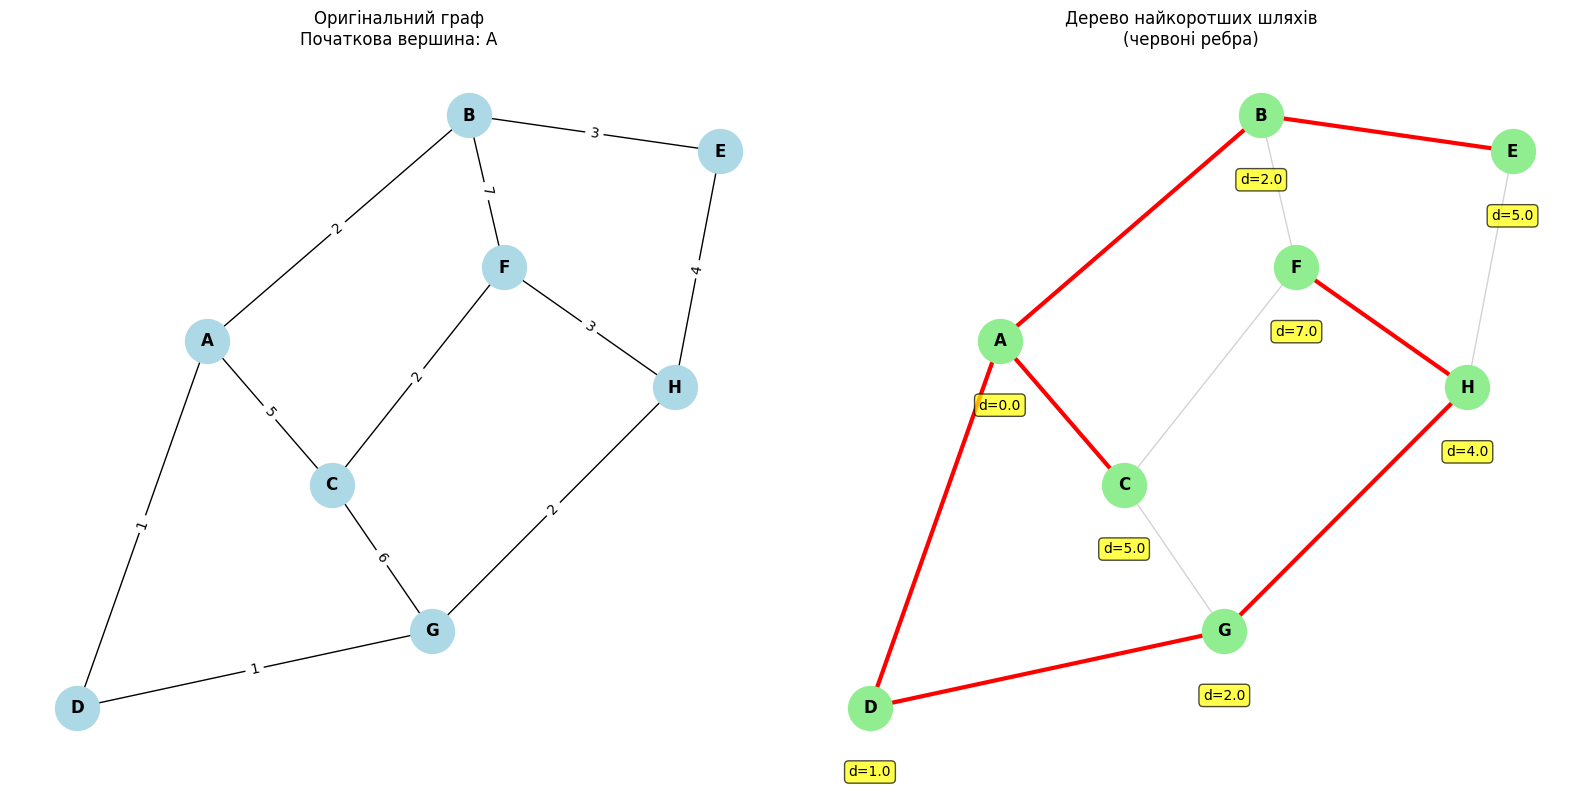


2. МІНІМАЛЬНІ ОСТОВНІ ДЕРЕВА:
   Алгоритм Пріма: вага MST = 14.0
     A - D: 1
     D - G: 1
     A - B: 2
     G - H: 2
     B - E: 3
     H - F: 3
     F - C: 2


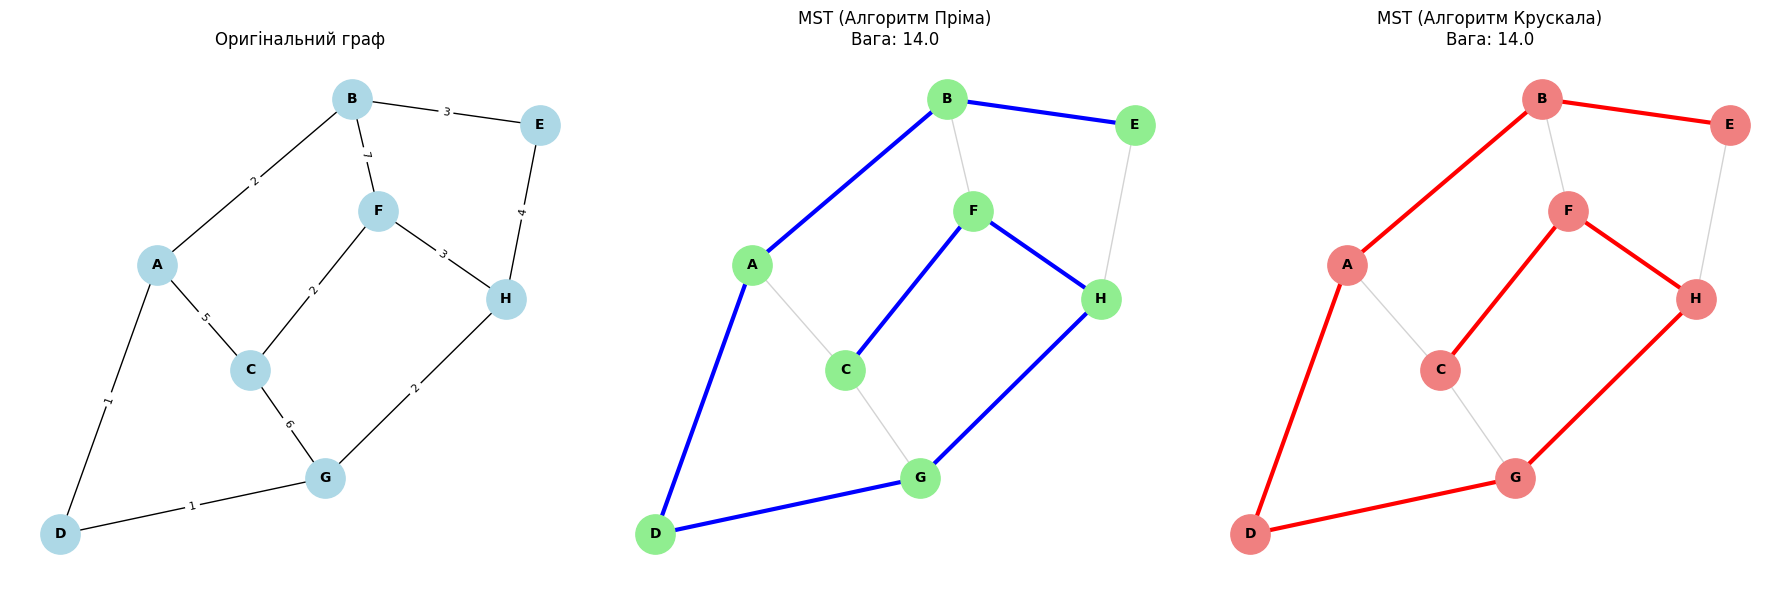

Вага MST (Прім): 14.0
Вага MST (Крускал): 14.0
Результати збігаються: Так


({'A': 0, 'B': 2, 'C': 5, 'D': 1, 'E': 5, 'F': 7, 'G': 2, 'H': 4},
 [Edge(start='A', end='D', weight=1),
  Edge(start='D', end='G', weight=1),
  Edge(start='A', end='B', weight=2),
  Edge(start='G', end='H', weight=2),
  Edge(start='B', end='E', weight=3),
  Edge(start='H', end='F', weight=3),
  Edge(start='F', end='C', weight=2)])

In [16]:
# Реалістичний приклад: дорожня мережа між містами
graph = {
    'A': [('B', 2), ('C', 5), ('D', 1)],
    'B': [('A', 2), ('E', 3), ('F', 7)],
    'C': [('A', 5), ('F', 2), ('G', 6)],
    'D': [('A', 1), ('G', 1)],
    'E': [('B', 3), ('H', 4)],
    'F': [('B', 7), ('C', 2), ('H', 3)],
    'G': [('C', 6), ('D', 1), ('H', 2)],
    'H': [('E', 4), ('F', 3), ('G', 2)]
}

demo_graph_algorithms(graph=graph, start_node='A')


 ### Аналіз графових алгоритмів



 **Алгоритм Дейкстри:**

 - **Переваги:** оптимальний для невід'ємних ваг, ефективний

 - **Обмеження:** не працює з від'ємними вагами

 - **Альтернативи:** Беллман-Форд (з від'ємними вагами), A* (з евристикою)



 **Мінімальне остовне дерево:**

 - **Пріма:** краще для щільних графів

 - **Крускала:** краще для розріджених графів

 - **Обидва алгоритми:** дають оптимальний результат завдяки матроїдній структурі



 **Практичні застосування:**

 - Маршрутизація в мережах

 - Проектування інфраструктури

 - Кластеризація даних

 - Планування логістики

 ## 8. Задача комівояжера (TSP) - продовження



 ### Контраст між жадібним та оптимальним підходами



 Задача комівояжера (Traveling Salesman Problem) є класичним прикладом NP-повної задачі, де жадібні алгоритми дають лише приблизні рішення.



 ### Формулювання задачі

 Знайти найкоротший замкнений маршрут, що проходить через всі міста рівно один раз.



 ### Підходи до розв'язання



 **1. Жадібний алгоритм (Nearest Neighbor):**

 - Завжди їдемо до найближчого невідвідуваного міста

 - Швидкий O(n²), але не оптимальний

 - Може дати результат у 2 рази гірший за оптимальний



 **2. Динамічне програмування (Held-Karp):**

 - Гарантує оптимальний результат

 - Складність O(n²2ⁿ) - експоненційна, але краща за повний перебір O(n!)

 - Використовує бітмаски для представлення множин відвідуваних міст



 **3. Метаевристики:**

 - Генетичні алгоритми, симульоване відпалення

 - Наближені рішення за розумний час

 - Добре масштабуються для великих задач



 ### Математична модель TSP

 ```

 Мінімізувати: Σᵢⱼ cᵢⱼ × xᵢⱼ

 При обмеженнях:

 - Σⱼ xᵢⱼ = 1 (виходимо з кожного міста рівно раз)

 - Σᵢ xᵢⱼ = 1 (входимо в кожне місто рівно раз)

 - Підтури виключені

 ```

ДЕМОНСТРАЦІЯ: Задача Комівояжера (TSP) - Жадібна евристика
Матриця відстаней між містами:
  Київ → Львів: 540 км
  Київ → Одеса: 475 км
  Київ → Харків: 480 км
  Львів → Київ: 540 км
  Львів → Одеса: 790 км
  Львів → Харків: 1050 км
  Одеса → Київ: 475 км
  Одеса → Львів: 790 км
  Одеса → Харків: 730 км
  Харків → Київ: 480 км
  Харків → Львів: 1050 км
  Харків → Одеса: 730 км

Жадібна евристика 'Найближчий сусід' (початок: Київ):
  Маршрут: Київ → Одеса → Харків → Львів → Київ
  Загальна відстань: 2795.0 км

УВАГА: Це евристика для NP-повної задачі!
  ✓ Швидко знаходить 'достатньо хороший' розв'язок
  ✗ Не гарантує оптимальність


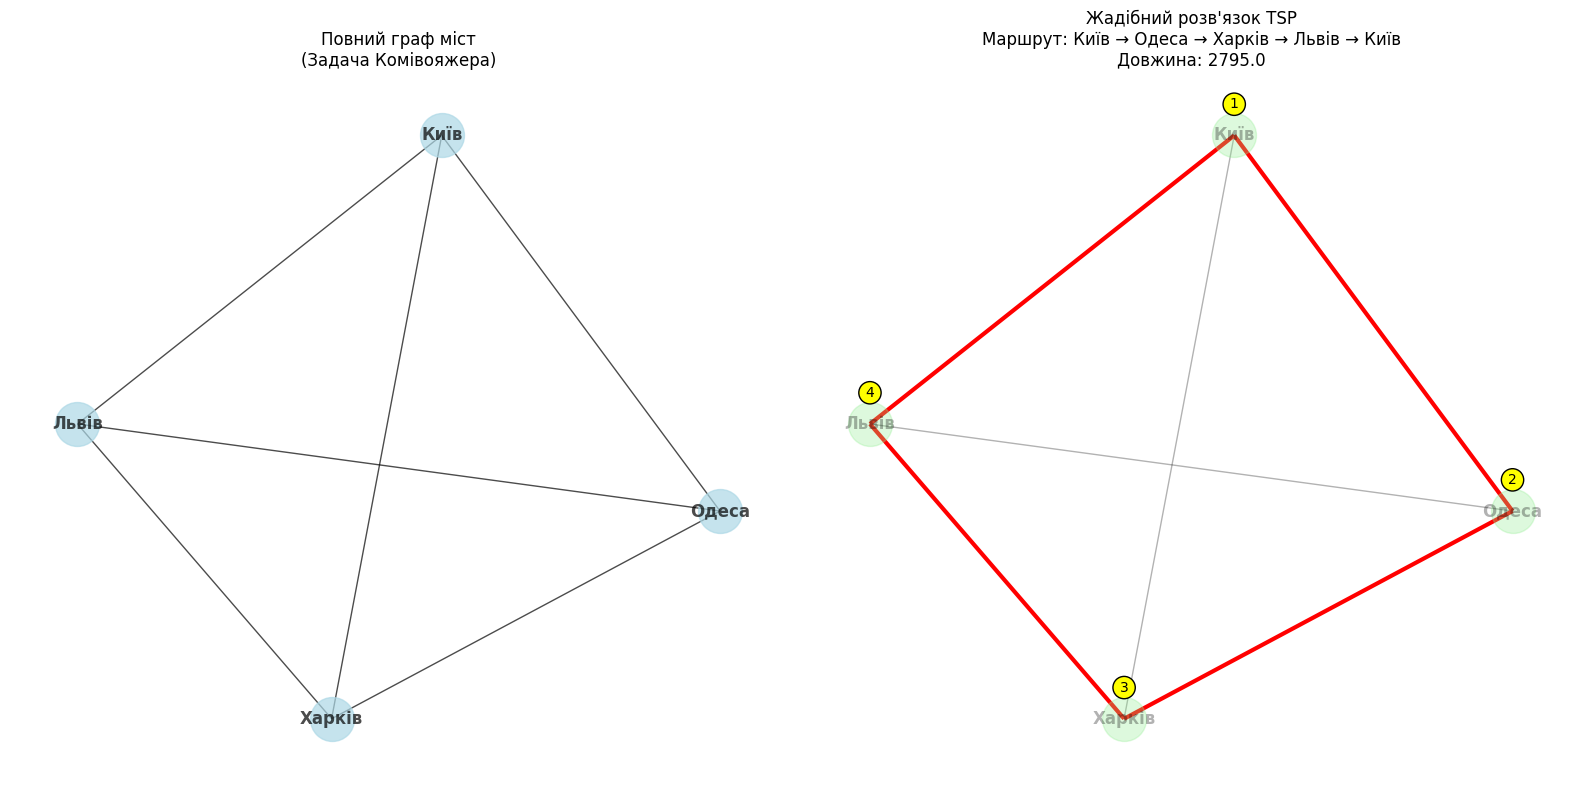

(['Київ', 'Одеса', 'Харків', 'Львів', 'Київ'], 2795.0)

In [17]:
# Демонстрація базового TSP
demo_tsp()


ДЕМОНСТРАЦІЯ: Задача Комівояжера (TSP) - Жадібна евристика
Матриця відстаней між містами:
  Дніпро → Київ: 475 км
  Дніпро → Львів: 930 км
  Дніпро → Одеса: 500 км
  Дніпро → Харків: 210 км
  Київ → Дніпро: 475 км
  Київ → Львів: 540 км
  Київ → Одеса: 475 км
  Київ → Харків: 480 км
  Львів → Дніпро: 930 км
  Львів → Київ: 540 км
  Львів → Одеса: 790 км
  Львів → Харків: 1050 км
  Одеса → Дніпро: 500 км
  Одеса → Київ: 475 км
  Одеса → Львів: 790 км
  Одеса → Харків: 730 км
  Харків → Дніпро: 210 км
  Харків → Київ: 480 км
  Харків → Львів: 1050 км
  Харків → Одеса: 730 км

Жадібна евристика 'Найближчий сусід' (початок: Київ):
  Маршрут: Київ → Дніпро → Харків → Одеса → Львів → Київ
  Загальна відстань: 2745.0 км

УВАГА: Це евристика для NP-повної задачі!
  ✓ Швидко знаходить 'достатньо хороший' розв'язок
  ✗ Не гарантує оптимальність


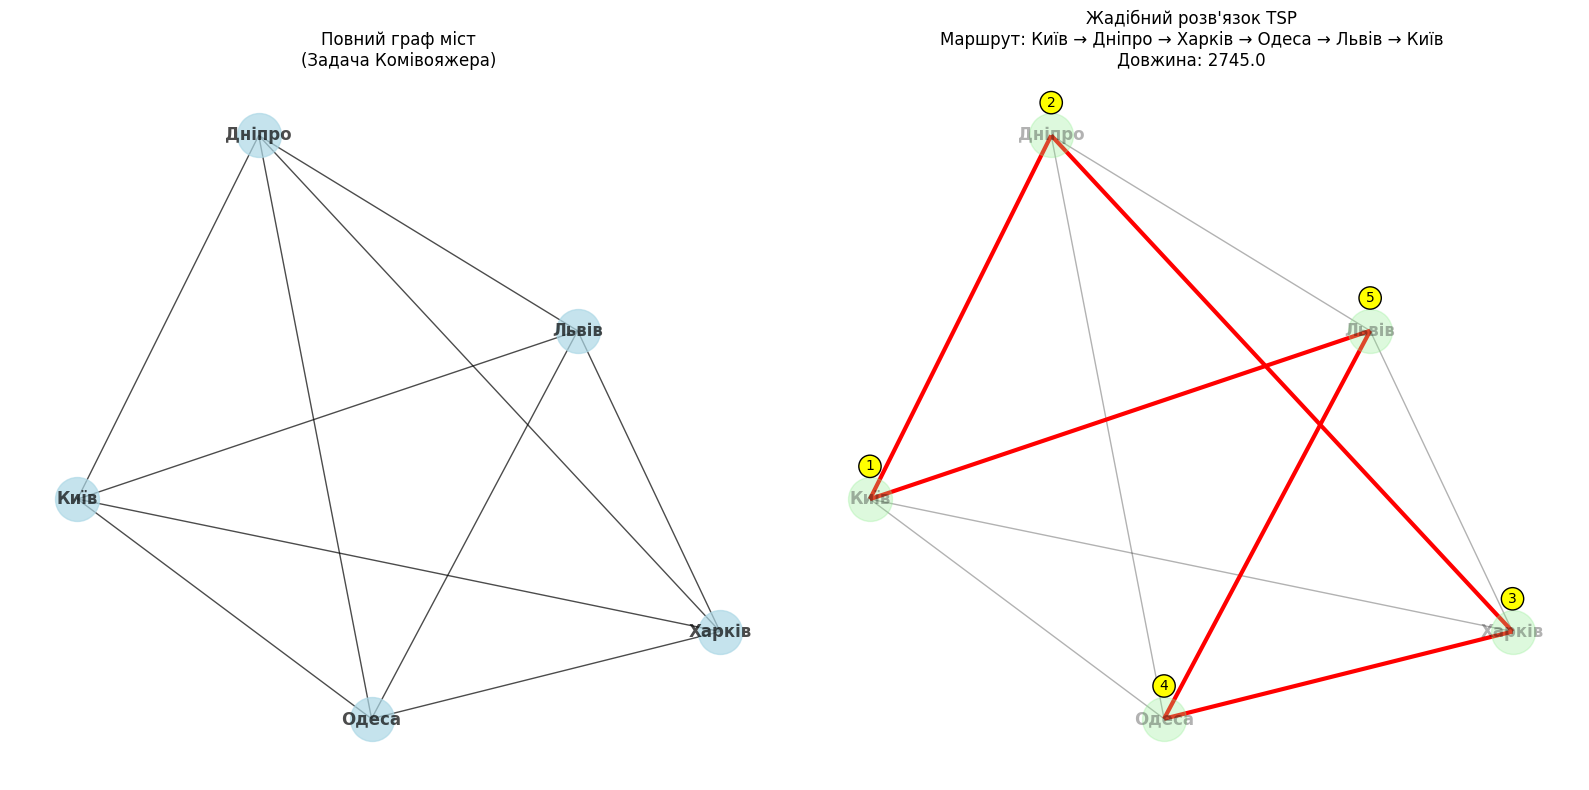

(['Київ', 'Дніпро', 'Харків', 'Одеса', 'Львів', 'Київ'], 2745.0)

In [18]:
# Реалістичний приклад: подорож по містах України
distances = {
    ('Київ', 'Львів'): 540,
    ('Київ', 'Одеса'): 475,
    ('Київ', 'Харків'): 480,
    ('Київ', 'Дніпро'): 475,
    ('Львів', 'Одеса'): 790,
    ('Львів', 'Харків'): 1050,
    ('Львів', 'Дніпро'): 930,
    ('Одеса', 'Харків'): 730,
    ('Одеса', 'Дніпро'): 500,
    ('Харків', 'Дніпро'): 210,
}

demo_tsp(distances=distances, start_city='Київ')


 ### Аналіз TSP: коли жадібність підводить



 **Проблеми жадібного підходу в TSP:**

 1. **Локальні оптимуми** - найближче місто може вести до довгого загального маршруту

 2. **Відсутність глобального бачення** - не врахування майбутніх наслідків вибору

 3. **Структурні обмеження** - залишаючи важкодоступні міста на кінець



 **Чому динамічне програмування працює:**

 - Розглядає всі можливі підмножини міст

 - Має оптимальну підструктуру: оптимальний маршрут містить оптимальні підмаршрути

 - Уникає повторних обчислень через мемоізацію



 **Практичні компроміси:**

 - Для n ≤ 20: використовуємо точний DP алгоритм

 - Для n > 20: метаевристики або апроксимаційні алгоритми

 - У реальному житті: гібридні підходи (жадібний + локальна оптимізація)

 ## 9. Комплексний аналіз та порівняння



 ### Матриця вибору алгоритмічного підходу



 | Критерій | Жадібні алгоритми | Динамічне програмування |
 |----------|-------------------|--------------------------|
 | **Часова складність** | O(n log n) або O(n) | O(n²) до O(2ⁿ) |
 | **Просторова складність** | O(1) до O(n) | O(n) до O(n²) |
 | **Оптимальність** | Не завжди | Завжди (якщо застосовне) |
 | **Простота реалізації** | Висока | Середня до складної |
 | **Інтуїтивність** | Висока | Потребує розуміння структури |
 | **Налагодження** | Легке | Складніше |
 | **Масштабованість** | Відмінна | Обмежена розміром задачі |



 ### Алгоритм вибору підходу



 **Використовуйте жадібні алгоритми коли:**

 1. ✅ Задача має властивість жадібного вибору

 2. ✅ Локальний оптимум веде до глобального

 3. ✅ Швидкість критично важлива

 4. ✅ Приблизне рішення прийнятне

 5. ✅ Простота реалізації важлива



 **Використовуйте динамічне програмування коли:**

 1. ✅ Потрібен точний оптимальний результат

 2. ✅ Є перекриваючі підзадачі

 3. ✅ Задача має оптимальну підструктуру

 4. ✅ Ресурси дозволяють складніші обчислення

 5. ✅ Жадібний підхід провалився



 ### Гібридні підходи



 У реальних системах часто використовують комбінації:



 **1. Жадібний + локальна оптимізація:**

 - Швидкий жадібний алгоритм для початкового рішення

 - DP або пошук для покращення в критичних областях



 **2. Розділяй і володарюй + DP:**

 - Розбиття великої задачі на менші частини

 - DP для оптимізації кожної частини



 **3. Апроксимаційні схеми:**

 - Контрольований компроміс між точністю та швидкістю

 - Параметр ε для контролю якості апроксимації

 ## 10. Практичні рекомендації та сучасні застосування



 ### Сучасні тренди в алгоритмах



 **Machine Learning і алгоритми:**

 - **Жадібні підходи:** градієнтний спуск, жадібне навчання нейромереж

 - **Динамічне програмування:** оптимізація гіперпараметрів, планування в RL



 **Розподілені системи:**

 - **Жадібні алгоритми:** легко паралелізуються, підходять для Map-Reduce

 - **DP:** потребує більш складної координації, але дає кращі результати



 **Мобільні та IoT додатки:**

 - **Жадібні:** енергоефективність, швидкість відгуку

 - **DP:** використовується для критичних рішень з достатніми ресурсами



 ### Типові помилки та як їх уникнути



 **При використанні жадібних алгоритмів:**

 1. ❌ Припущення оптимальності без доведення

 2. ❌ Ігнорування контрприкладів

 3. ❌ Неправильний вибір жадібного критерію

 4. ✅ Завжди тестуйте на крайових випадках

 5. ✅ Порівнюйте з точними рішеннями на малих задачах



 **При використанні динамічного програмування:**

 1. ❌ Неправильне визначення стану

 2. ❌ Забуття про базові випадки

 3. ❌ Неефективне використання пам'яті

 4. ✅ Чітко визначте рекурентні залежності

 5. ✅ Оптимізуйте пам'ять коли можливо



 ### Інструменти та бібліотеки



 **Python:**

 - `heapq` - пріоритетні черги для жадібних алгоритмів

 - `functools.lru_cache` - мемоізація для DP

 - `numpy` - ефективні операції з масивами

 - `networkx` - графові алгоритми



 **Спеціалізовані бібліотеки:**

 - `OR-Tools` (Google) - оптимізаційні задачі

 - `SCIP` - цілочислове програмування

 - `Gurobi` - комерційний solver



 ### Метрики оцінювання алгоритмів



 **Для жадібних алгоритмів:**

 - Коефіцієнт апроксимації (наскільки гірше за оптимум)

 - Швидкість виконання на реальних даних

 - Стабільність результатів



 **Для динамічного програмування:**

 - Використання пам'яті

 - Масштабованість

 - Час до отримання першого результату

 ## 11. Висновки та напрямки подальшого вивчення



 ### Ключові висновки курсу



 **1. Не існує універсального підходу**

 - Кожна задача має свої особливості

 - Важливо розуміти структуру задачі

 - Компроміс між точністю та ефективністю завжди присутній



 **2. Важливість математичного обґрунтування**

 - Властивість жадібного вибору - ключ до успіху жадібних алгоритмів

 - Оптимальна підструктура необхідна для DP

 - Формальне доведення коректності критично важливе



 **3. Практичні міркування**

 - Розмір задачі визначає вибір алгоритму

 - Обмеження ресурсів впливають на рішення

 - Підтримуваність коду також важлива



 ### Розширені теми для вивчення



 **Алгоритмічні парадигми:**

 - Розділяй і володарюй (Divide and Conquer)

 - Зворотне відстеження (Backtracking)

 - Гілки та межі (Branch and Bound)

 - Випадкові алгоритми (Randomized Algorithms)



 **Спеціалізовані області:**

 - Алгоритми на графах (мережеві потоки, матчинг)

 - Геометричні алгоритми

 - Паралельні та розподілені алгоритми

 - Квантові алгоритми



 **Оптимізаційні методи:**

 - Лінійне програмування

 - Цілочислове програмування

 - Метаевристики (генетичні алгоритми, симульоване відпалення)

 - Математичне програмування




 ## 12. Додаткові практичні завдання та вправи



 ### Завдання для самостійної роботи



 **Рівень 1: Початковий**



 1. **Модифікація Activity Selection:**

    - Реалізуйте варіант, де кожна активність має свою вагу/пріоритет

    - Порівняйте результати з класичним алгоритмом



 2. **Coin Change з обмеженнями:**

    - Кожна монета може використовуватися обмежену кількість разів

    - Реалізуйте як жадібний, так і DP підходи



 3. **Fractional vs 0/1 Knapsack:**

    - На одному наборі даних порівняйте результати обох підходів

    - Проаналізуйте різницю в оптимальних значеннях



 **Рівень 2: Середній**



 4. **Job Scheduling Problem:**

    - Маємо роботи з часом виконання та дедлайнами

    - Мінімізувати загальне запізнення

    - Реалізуйте жадібний та DP підходи



 5. **Edit Distance (Levenshtein Distance):**

    - Мінімальна кількість операцій для перетворення одного рядка в інший

    - Класична задача DP

    - Додайте візуалізацію матриці обчислень



 6. **Maximum Subarray Problem:**

    - Реалізуйте алгоритм Kadane (жадібний підхід)

    - Порівняйте з DP розв'язком



 **Рівень 3: Просунутий**



 7. **Multi-dimensional Knapsack:**

    - Рюкзак з кількома обмеженнями (вага, об'єм, вартість)

    - Реалізуйте DP розв'язок



 8. **Longest Common Subsequence (LCS):**

    - Для кількох рядків одночасно

    - Оптимізуйте використання пам'яті



 9. **Advanced TSP variants:**

    - TSP з вікнами часу

    - Multiple TSP (кілька комівояжерів)

    - TSP з обов'язковими зупинками

 ## Додаток: Чек-листи та шаблони



 ### Чек-лист для жадібних алгоритмів



 **Перед реалізацією:**

 - [ ] Чи має задача властивість жадібного вибору?

 - [ ] Чи приводить локальний оптимум до глобального?

 - [ ] Чи можна довести коректність математично?

 - [ ] Чи є контрприклади для жадібного підходу?

 - [ ] Чи прийнятне приблизне рішення?



 **Під час реалізації:**

 - [ ] Правильно визначений критерій сортування/вибору

 - [ ] Враховані всі обмеження задачі

 - [ ] Реалізовані перевірки коректності вхідних даних

 - [ ] Оптимізована часова складність



 **Після реалізації:**

 - [ ] Протестовано на крайових випадках

 - [ ] Порівняно з відомими оптимальними рішеннями

 - [ ] Виміряна продуктивність на великих даних

 - [ ] Задокументована логіка алгоритму



 ### Чек-лист для динамічного програмування



 **Аналіз задачі:**

 - [ ] Чи є перекриваючі підзадачі?

 - [ ] Чи має задача оптимальну підструктуру?

 - [ ] Чи можна визначити рекурентні залежності?

 - [ ] Які базові випадки?

 - [ ] Який розмір простору станів?



 **Проектування:**

 - [ ] Визначено стан (що зберігаємо в dp[...])

 - [ ] Записана рекурентна формула

 - [ ] Обрано підхід (мемоізація vs табуляція)

 - [ ] Оцінена просторова складність



 **Імплементація:**

 - [ ] Правильно ініціалізовані базові випадки

 - [ ] Правильний порядок заповнення таблиці

 - [ ] Оптимізована пам'ять (якщо можливо)

 - [ ] Реалізовано відновлення рішення (якщо потрібно)

 ##  Завершальні думки та рефлексія



 ### Філософія алгоритмічного мислення



 **Жадібні алгоритми** втілюють принцип "живи моментом" - роблять найкращий вибір зараз, не переймаючись майбутнім. Це природно для людини, але не завжди оптимально.



 **Динамічне програмування** представляє "стратегічне мислення" - систематично розглядає всі варіанти та їх наслідки. Це потребує більше ресурсів, але гарантує найкращий результат.



 ### Уроки для життя та роботи



 **З жадібних алгоритмів:**

 - Іноді простота перемагає складність

 - Швидкі рішення можуть бути достатньо хорошими

 - Важливо розуміти, коли "достатньо хорошо" справді достатньо



 **З динамічного програмування:**

 - Інвестиції в планування окупаються

 - Систематичний підхід перемагає інтуїцію

 - Минулий досвід (мемоізація) цінний для майбутніх рішень



 ### Розвиток алгоритмічного мислення



 **Практичні поради:**

 1. **Починайте з простого** - реалізуйте наївне рішення спочатку

 2. **Шукайте шаблони** - багато задач мають схожу структуру

 3. **Практикуйтеся регулярно** - алгоритмічне мислення потребує тренування

 4. **Аналізуйте чужий код** - вивчайте різні підходи до розв'язання

 5. **Не бійтеся помилок** - кожна помилка це урок



 **Ресурси для подальшого розвитку:**

 - Участь у змаганнях з програмування

 - Регулярне розв'язування задач на платформах

 - Читання класичної літератури з алгоритмів

 - Обговорення рішень з іншими програмістами



 ### Майбутнє алгоритмів



 **Сучасні тенденції:**

 - Квантові алгоритми

 - Machine Learning оптимізація

 - Алгоритми для Big Data

 - Біоінспіровані підходи



 **Незмінні принципи:**

 - Розуміння структури задачі

 - Баланс між ефективністю та простотою

 - Важливість математичного обґрунтування

 - Цінність практичного досвіду



 Пам'ятайте: алгоритми - це не лише інструменти для розв'язання задач, а й спосіб мислення, що допомагає структурувати підхід до будь-яких проблем у житті та роботі.



 Успіхів у вашій алгоритмічній подорожі! 🎯